In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint.csv'
model_save_path = 'model/aslr_model.hdf5'
tflite_save_path = 'model/aslr_model.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 24

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 24)                264       
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/8 [==>...........................] - ETA: 6s - loss: 3.2686 - accuracy: 0.0469
Epoch 1: saving model to model\aslr_model.hdf5
8/8 [==============================] - 1s 45ms/step - loss: 3.2348 - accuracy: 0.0375 - val_loss: 3.1619 - val_accuracy: 0.0449
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.2278 - accuracy: 0.0391
Epoch 2: saving model to model\aslr_model.hdf5
8/8 [==============================] - 0s 17ms/step - loss: 3.1967 - accuracy: 0.0397 - val_loss: 3.1505 - val_accuracy: 0.0417
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.1787 - accuracy: 0.0391
Epoch 3: saving model to model\aslr_model.hdf5
8/8 [==============================] - 0s 17ms/step - loss: 3.1783 - accuracy: 0.0450 - val_loss: 3.1425 - val_accuracy: 0.0417
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.1673 - accuracy: 0.0547
Epoch 4: saving model to model\aslr_model.hdf5
8/8 [==============================] - 0s 17ms/step 

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 3ms/step - loss: 0.8608 - accuracy: 0.7244


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 126ms/step
[1.0336087e-06 2.4524545e-22 7.6042073e-19 3.3124992e-14 2.2734457e-19
 4.3485032e-11 4.9496953e-21 8.0567674e-21 3.3341354e-09 3.2099085e-23
 2.2099997e-10 2.4304185e-15 1.0021464e-11 2.6645491e-17 3.3644369e-04
 9.9966252e-01 7.8713464e-14 4.6092777e-10 2.2127952e-22 6.7382896e-12
 4.9828024e-13 6.7064856e-21 1.5481514e-26 5.6763525e-08]
15


# Confusion matrix

10/10 [==============================] - 0s 2ms/step


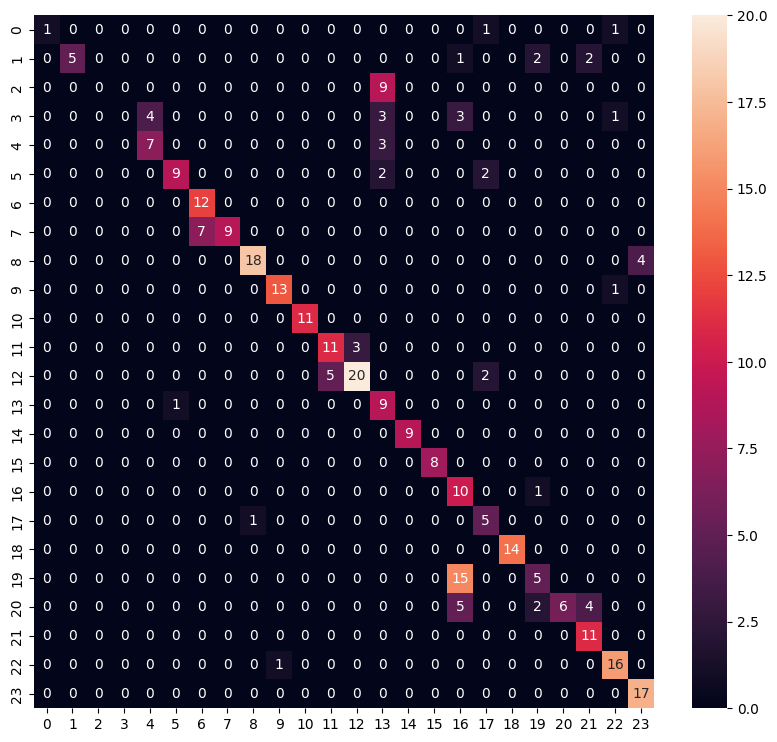

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      0.50      0.67        10
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        11
           4       0.64      0.70      0.67        10
           5       0.90      0.69      0.78        13
           6       0.63      1.00      0.77        12
           7       1.00      0.56      0.72        16
           8       0.95      0.82      0.88        22
           9       0.93      0.93      0.93        14
          10       1.00      1.00      1.00        11
          11       0.69      0.79      0.73        14
          12       0.87      0.74      0.80        27
          13       0.35      0.90      0.50        10
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         8
          16       0.29      0.91      0.44        11
     

c:\Dev\Project\SignLanguageRegognition\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Dev\Project\SignLanguageRegognition\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Dev\Project\SignLanguageRegognition\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(10, 9))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sam\AppData\Local\Temp\tmphk_k0tji\assets


INFO:tensorflow:Assets written to: C:\Users\Sam\AppData\Local\Temp\tmphk_k0tji\assets


7424

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.03360651e-06 2.45245420e-22 7.60420675e-19 3.31248633e-14
 2.27344568e-19 4.34849518e-11 4.94969571e-21 8.05673594e-21
 3.33412253e-09 3.20988386e-23 2.20999538e-10 2.43041853e-15
 1.00214255e-11 2.66454910e-17 3.36443685e-04 9.99662519e-01
 7.87133149e-14 4.60926020e-10 2.21280356e-22 6.73826359e-12
 4.98279261e-13 6.70648556e-21 1.54814523e-26 5.67633087e-08]
15
